In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from keras.layers import Flatten 


In [ ]:
data = pd.read_csv('../input/countries-of-the-world/countries of the world.csv')

I will be using the Countries of the World dataset from kaggle (link:https://www.kaggle.com/fernandol/countries-of-the-world)

The goal of this kaggle project is to understand the dataset, get some insights about it and finally train a model to predict GDP ($ per capita).

## Dataset Information

Details of the dataset:

* Country
* Region
* Population
* Area
* Pop. Density (per sq. mi.)
* Coastline (coast/area ratio)

* Net migration
* Infant mortality (per 1000 births)	
* GDP ($ per capita)	
* Literacy (%)	
* Phones (per 1000)	
* Arable (%)	
* Crops (%)	
* Other (%)	
* Climate	
* Birthrate	
* Deathrate	
* Agriculture	
* Industry	
* Service


In [ ]:
data.head(5)

## Data cleaning

In [ ]:
data.info()

removing brackets and stuff in brackets of column names and also rephrasing to have shorter column names 

In [ ]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

changing object type to float / category types

In [ ]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)

checking the new column names and data types

In [ ]:
data.info()

There are 227 countries in this dataset.

In [ ]:
data.shape

In [ ]:
data.head(5)

### Distribution of dataset

#### Boxplot for distribution analysis of numerical features

In [ ]:
fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=data[features[i]])
plt.tight_layout()
plt.show()

Observations:

* no outliers: birthrate, service
* afew outliers(<5 outliers): phones, other, climate
* significant number of outliers(>10 outliers, >= 5outliers): density, literacy, arable, agriculture, industry
* alot of outliers(>=10 outliers): population, area, coastline_area_ratio, net_migration, crops, deathrate

#### Histogram for distribution analysis of numerical features

In [ ]:
fig = plt.figure(figsize=(16,30))
features= ["population","area", "density", "coastline_area_ratio","net_migration","infant_mortality", "literacy", "phones", "arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"]

for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.distplot(data[features[i]])
plt.tight_layout()
plt.show()

#### Boxplot for distribution analysis of region (categorical data) with GDP per Capita

In [ ]:
# boxplot for distribution analysis of region (categorical data) with GDP per Capita

sns.boxplot(y=data['gdp_per_capita'],x= data['region'])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

#### **Target variable analysis for linear regression analysis**

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(data.loc[:,'gdp_per_capita'], norm_hist=True, ax = ax1)
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(data.loc[:,'gdp_per_capita'], orient='v', ax = ax3)
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % data['gdp_per_capita'].skew())
print("Kurtosis: %f" % data['gdp_per_capita'].kurt())

Observations:
* Our target variable, GDP per Capita is not normally distributed.
* Our target variable is right-skewed.
* There are 2 outliers in the variable

Therefore, normalisation will be applied.

### Missing data

Showing number of null values as a percentage. From the data, we can see that 14 out of 20 columns have null values. The column with the largest null value is climate, with a null percentage of 9.69. However, the null percentage is still quite small (<10%).

In [ ]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False))*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=percent.index, y=percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

To visualise rows (227 countries) in data that have missing data 

In [ ]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

## Feature Engineering
### Handling missing data

I will first look at the dataset again to gain a brief understanding of the common values in the dataset.

In [ ]:
data.head(20)

In [ ]:
print(data.isnull().sum())

##### Analysis of missing data of gdp per capita column
Finding out which country has a null value for gdp per capita. It turns out that its western sahara.

In [ ]:
data['gdp_per_capita'].isnull()

In [ ]:
data['country'].iloc[223]

#### Analysis of missing data of literacy column

In [ ]:
data[data['literacy'].isnull()].index.tolist()

Faroe Islands is located in western europe

In [ ]:
print(data['country'].iloc[66])
print(data['region'].iloc[66])

#### Analysis of missing data of phone column

In [ ]:
data[data['phones'].isnull()].index.tolist()

In [ ]:
print(data['country'].iloc[52])
print(data['region'].iloc[52])

#### Analysis of missing data of climate column

In [ ]:
data['climate']

#### Analysis of missing data of agriculture column

In [ ]:
data['agriculture']

In [ ]:
data[data['agriculture'].isnull()].index.tolist()

In [ ]:
print(data.iloc[3])
print(data.iloc[4])
print(data.iloc[78])
print(data.iloc[80])
print(data.iloc[83])
print(data.iloc[134])
print(data.iloc[140])
print(data.iloc[144])
print(data.iloc[153])
print(data.iloc[171])
print(data.iloc[174])
print(data.iloc[177])
print(data.iloc[208])
print(data.iloc[221])
print(data.iloc[223])

#### Analysis of missing data of industry column

In [ ]:
data[data['industry'].isnull()].index.tolist()

In [ ]:
print(data.iloc[138])

### Inputting missing data
Conclusion:

How I am going to handle the missing data:

Replacing null value with mean vs median (if not already replaced by 0):

Observations from box plot plotted earlier:

* no outliers: birthrate, service
* afew outliers(<5 outliers): phones, other, climate
* significant number of outliers(>10 outliers, >= 5outliers): density, literacy, arable, agriculture, industry
* alot of outliers(>=10 outliers): population, area, coastline_area_ratio, net_migration, crops, deathrate

For features that do not have any outliers, i will replace it with mean whereas I will replace the rest with median.

1. Net Migration: there are 3 null values. I will replace the null values with 0.
2. infant_mortality: there are 3 null values. I will replace the null values with 0.
3. gdp_per_capita: there is 1 null value. The country with a null value for gdp per capita is western sahara. Using google search, the gdp per capita is $2500. I will replace the null value with 2500.
4. literacy: there are 18 null values. I will replace the null values with the **median** literacy value of the country's region. 
5. phones: there are 4 null values. I will replace the null values with the **median** number of phones of the country's region.
6. arable: there are 2 null values. I will replace the null values with 0.
7. crops: there are 2 null values. I will replace the null values with 0.
8. other: there are 2 null values. I will replace the null values with 0.
9. climate: there are 22 null values. I will replace the null values with 0, where 0 represents that climate is unknown (is null).
10. birthrate: there are 3 null values. I will replace the null values with the **mean** birthrate of the country's region.
11. deathrate: there are 4 null values. I will replace the null values with the **median** deathrate of the country's region.
12. agriculture, industry,service : Agriculture and service have 15 null values while industry has 16 null values. All belong to very small island nations. After inspection for similar nations, we found that those kind of nations usually have economies that rely heavily on services, with some agricultural and industrial activities. So we will replace the missing values with the following: agricultue = 0.15, industry = 0.05. service = 0.8. 

**Exception for western sahara where service already has a value of 0.4 and Monaco where agriculture already has a value of 0.17. For monaco, i will set the value for industry and service to be 0.05 and 0.78 respectively. For western sahara, i will set the value for agriculture and industry to be 0.35 and 0.25 respectively.

In [ ]:
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality'].fillna(0, inplace=True)
data['gdp_per_capita'].fillna(2500, inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('median'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('median'), inplace= True)
data['arable'].fillna(0, inplace=True)
data['crops'].fillna(0, inplace=True)
data['other'].fillna(0, inplace=True)
data['climate'].fillna(0, inplace=True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace= True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('median'), inplace= True)

In [ ]:
# For monaco, i will set the value for industry and service to be 0.05 and 0.78 respectively 
data['industry'][138] = 0.05
data['service'][138] = 0.78
print(data['industry'][138])
print(data['service'][138])



In [ ]:
# For western sahara, i will set the value for agriculture and industry to be 0.35 and 0.25 respectively.
data['industry'][223] = 0.25
data['agriculture'][223] = 0.35
print(data['industry'][223])
print(data['agriculture'][223])

In [ ]:
data['agriculture'].fillna(0.15, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna(0.05, inplace= True)

checking to see that there are no null values

In [ ]:
print(data.isnull().sum())

# Exploratory analysis

### Correlation heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data.corr(), annot=True, ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()


Observations:

strong correaltion (>0.7)
* there is a strong positive correlation between gdp per capita and phones (0.83)
* there is a strong positive correlation between infant mortality and birthrate (0.84)
* there is a strong nagative correaltion between literacy and birthrate (-0.78)
* there is a strong negative correlation between literacy and infant motality (-0.75)
* there is a strong negative correaltion between birthrate and phones (-0.72)
* there is a strong negative correaltion between other and arable (-0.73)

### GDP analysis

In [ ]:
fig = plt.figure(figsize=(12, 4))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Average GDP per Capita')
plt.show()

Observations:

As expected, western europe and northern america are the regions that have the highest GDP per capita and on the other hand, sub-saharan africa is the region that has the lowest GDP per capita. The average GDP per capita of western europe is slightly higher than northern america.

In [ ]:
sns.boxplot(x="region",y="gdp_per_capita",data=data,width=0.7,palette="Set3",fliersize=5)
plt.xticks(rotation=90)
plt.title("Regional Average GDP per Capita")

Observations:

From the boxplots, it is derived that the median average GDP per capita is sligher hgiher for northern america than western europe. However, the interquartitle range and the range is alot larger for northern america than western europe. This may explained by the generous welfare system for countries in the european union which is funded through high tax rates on the rich.

#### GDP per capita VS Literacy

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'literacy', y= 'gdp_per_capita', kind= 'scatter')
plt.title('GDP Analysis: GDP per capita vs Literacy')
plt.show()

Observation:

From the joinplot graph, it is clear that the higher the literacy rate, the higher likelihood that the gdp per capita is higher. But it is also good to note that there are many countries with a high literacy rate but has a low gdp per capita, but there is no country that has a low literacy rate but have a high gdp per capita.

#### GDP per capita VS phones

Since GDP per capita and phones have a strong positive correlation as shown in the correlation heatmap, I want to see the relationship when plotted on a joinplot.

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'phones', y= 'gdp_per_capita', kind= 'scatter')
plt.title('GDP Analysis: GDP per capita vs Literacy')
plt.show()

cool way to show joinplot too with kind = 'hex'. From the hex plot, it is very easy to see the concentrations at particular points of the graph.

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'phones', y= 'gdp_per_capita', kind= 'hex')
plt.title('GDP Analysis: GDP per capita vs Literacy')
plt.show()

#### GDP per capita VS infant_mortality 

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'infant_mortality', y= 'gdp_per_capita', kind= 'scatter')
plt.title('GDP Analysis: GDP per capita vs infant_mortality ')
plt.show()

#### birthrate VS infant_mortality 

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'birthrate', y= 'infant_mortality', kind= 'scatter')
plt.title('GDP Analysis: birthrate vs infant_mortality')
plt.show()

#### **Let's look at the birthrate and deathrate of top 100 countries and last 100 countries interactively.**

In [ ]:
gdp=data.sort_values(["gdp_per_capita"],ascending=False)

# prepare data frame
df = gdp.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.birthrate,
                    mode = "lines",
                    name = "Birthrate",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.deathrate,
                    mode = "lines+markers",
                    name = "Deathrate",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)
z = [trace1, trace2]
layout = dict(title = 'Birthrate and Deathrate of World Countries (Top 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

In [ ]:
gdp=data.sort_values(["gdp_per_capita"],ascending=False)

In [ ]:
# prepare data frame
df = gdp.iloc[127:227,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.birthrate,
                    mode = "lines",
                    name = "Birthrate",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.deathrate,
                    mode = "lines+markers",
                    name = "Deathrate",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)
z = [trace1, trace2]
layout = dict(title = 'Birthrate and Deathrate Percentage of World Countries (Last 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

Observations:

As predicted, there is a downward trend where when GDP decreases, both Birthrate and death rate decreases. This trend is present in both the top 100 countries and the last 100 countries. However, there are anomalies such as Lesotho in the last 100 graph and Oman in the top 100 graph.

#### **Let's look at percentage of agriculture , industry and service of top 100 and last 100 countries interactively**

In [ ]:
# prepare data frame
df = gdp.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.agriculture,
                    mode = "lines+markers",
                    name = "AGRICULTURE",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.industry,
                    mode = "lines+markers",
                    name = "INDUSTRY",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)
# Creating trace3
trace3 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.service,
                    mode = "lines+markers",
                    name = "SERVICE",
                    marker = dict(color = 'rgba(10,250,60, 0.8)'),
                    text= df.country)


z = [trace1, trace2,trace3]
layout = dict(title = 'Service , Industry and Agriculture Percentage of World Countries (TOP 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

In [ ]:
# prepare data frame
df = gdp.iloc[127:227,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.agriculture,
                    mode = "lines+markers",
                    name = "AGRICULTURE",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)
# Creating trace2
trace2 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.industry,
                    mode = "lines+markers",
                    name = "INDUSTRY",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)
# Creating trace3
trace3 = go.Scatter(
                    x = df.gdp_per_capita,
                    y = df.service,
                    mode = "lines+markers",
                    name = "SERVICE",
                    marker = dict(color = 'rgba(10,250,60, 0.8)'),
                    text= df.country)


z = [trace1, trace2,trace3]
layout = dict(title = 'Service , Industry and Agriculture Percentage of World Countries (LAST 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False)
             )
fig = dict(data = z, layout = layout)
iplot(fig)

Observations:

As expected, the top 100 countries have a very high service percentage (averaged at around 70%) and a very low agriculture percentage (averaged at around 3%) whereas the bottom 100 countries have a lower service percentage, in relation with the top 100 countries (averaged at around 43%) and a higher agriculture percentage (averaged at around 22%). However, it is interesting to note that service has the highest weightage amongst the 3 sectors in most of the last 100 countries and not agriculture.

#### **Let's look at agriculture and service features of top 7 countries (literacy)**

In [ ]:
lit = data.sort_values("literacy",ascending=False).head(7)

In [ ]:
trace1 = go.Bar(
                x = lit.country,
                y = lit.agriculture,
                name = "agriculture",
                marker = dict(color = 'rgba(255, 20, 20, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = lit.gdp_per_capita)
trace2 = go.Bar(
                x = lit.country,
                y = lit.service,
                name = "service",
                marker = dict(color = 'rgba(20, 20, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = lit.gdp_per_capita)
z = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = z, layout = layout)
iplot(fig)

#### **Let's look at industry and service features of top 7 countries (literacy)**

In [ ]:
x = lit.country

trace1 = {
  'x': x,
  'y': lit.industry,
  'name': 'industry',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': lit.service,
  'name': 'service',
  'type': 'bar'
};
z = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 7 country'},
  'barmode': 'relative',
  'title': 'industry and service percentage of top 7 country (literacy)'
};
fig = go.Figure(data = z, layout = layout)
iplot(fig)

In [ ]:
#Population per country
z = dict(type='choropleth',
            locations = data.country,
            locationmode = 'country names', z = data.population,
            text = data.country, colorbar = {'title':'Population'},
            colorscale = 'Blackbody', reversescale = True)

layout = dict(title='Population per country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [z],layout = layout)
iplot(choromap,validate=False)

In [ ]:
#Infant motality per country
z = dict(type='choropleth',
        locations = data.country,
        locationmode = 'country names', z = data.infant_mortality,
        text = data.country, colorbar = {'title':'Infant Mortality'},
        colorscale = 'YlOrRd', reversescale = True)
layout = dict(title='Infant Mortality per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [z],layout = layout)
iplot(choromap,validate=False)

In [ ]:
data.head(5)

In [ ]:
#Population per country
z = dict(type='choropleth',
locations = data.country,
locationmode = 'country names', z = data.gdp_per_capita,
text = data.country, colorbar = {'title':'GDP per Capita'},
colorscale = 'Hot', reversescale = True)
layout = dict(title='GDP per Capita of World Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [z],layout = layout)
iplot(choromap,validate=False)

### Regional analysis

In [ ]:
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= data, y= 'region', ax= ax1)
sns.barplot(data= data, y= 'region', x= 'gdp_per_capita', ax= ax2, ci= None)
sns.barplot(data= data, y= 'region', x= 'net_migration', ax= ax3, ci= None)
sns.barplot(data= data, y= 'region', x= 'population', ax= ax4, ci= None)
plt.show()

Observations:
* Sub-Saharian Africa and Latin America regions have the most countries within them, with 52 and 45 respectively.
* Western Europe and North America have the highest GDP per capita, while Sub-Saharian Africa has the lowest GDP per capita.
* Western Europe, Near east, Asia and  are the main regions where migrants from other regions go.
* Asia has the largest population, Oceania has the smallest.

## Data Preconditioning

In this section we will make our data ready for model training. This will include:
1. Transform 'region' column into numerical values.
2. Split data set into training and testing parts (80/20), while dropping the countries column (string, and not going to be used to train the models), and separating gdp_per_capita column, where it will be used as labels.
3. We will try different splits of our dataset (with/without feature selection, with/without feature scaling.

### Region transform

In [ ]:
data_final = pd.concat([data,pd.get_dummies(data['region'], prefix='region')], axis=1)
#dropping the redundant region column
data_final.drop(['region'],axis=1,inplace=True)
print(data_final.info())

In [ ]:
data_final.head(10)

We will be trying out 4 different ways in which the data is split.

#### **Data Split 1: all of our final dataset, no scaling**

In [ ]:
y = data_final['gdp_per_capita']
X = data_final.drop(['gdp_per_capita','country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### **Data Split 2: all of our final dataset, with scaling**

In [ ]:
#StandardScaler will transform data such that its distribution will have a mean value 0 and standard deviation of 1.
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

#### **Data Split 3: feature selected dataset, no scaling**

We will select only a portion of our features, the ones with coreelation score larger than -/+ 0.3 with gdp_per_capita.

In [ ]:
data_final[data_final.columns[1:]].corr()['gdp_per_capita'][:]

In [ ]:
y3 = y
X3 = data_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

#### **Data Split 4: feature selected dataset, with scaling**

In [ ]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Model building

### Linear Regression (Linear Model without Regularization)

This will be our baseline model.From our EDA, we can see that most features do not have a linear relationship with our labels (gdp_per_capita), yet we will try linear regression, and use the result as a reference (other methods should have better results).

In [ ]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

In [ ]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

In [ ]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', r2_score(y2_test, lm2_pred))

print('\nselected features, No scaling:')
print('MAE:', mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', r2_score(y3_test, lm3_pred))

print('\nselected features, with scaling:')
print('MAE:', mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', r2_score(y4_test, lm4_pred))


As predicted, y4 which uses both feature selection and scaling has the highest R^2 score. We will set R^2 score = 0.83 as the benchmark that will be compared when building other models.

Since y4 has the highest R2 score, we will plot its predicted against its actual values. 

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predicted GDP per Capita') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

Observations:

The graph is pretty decent as there is some sort of linearity with the points that are plotted. However, it is clear that this can be improved.


### Using Statsmodel to interpretate feature importance
refer to: [https://datatofish.com/statsmodels-linear-regression/](http://) 

It is a very useful tutorial to learn about the usage of statemodel in linear regression.

In [ ]:
model = sm.OLS(y4_train, X4_train).fit()
print_model = model.summary()
print(print_model)



Observations:

Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. The linear regression model has an Adjusted. R-squared of 0.354 which is not good.

In [ ]:
print(X3.columns[1])

In [ ]:
#what the coefficient values refers to
i=1
for col in X3.columns: 
    print("x"+str(i)+":"+str(col))
    i=i+1

In [ ]:
print(lm4.coef_)
from matplotlib import pyplot

importance = lm4.coef_
# summarize feature importance
# for i,v in enumerate(importance):
#     print("Feature:" + str(X3.columns[i]) + ", Score: %.5f" % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
features = {'Feature': ['density', 'net_migration','infant_mortality','literacy','phones', 'birthrate', 'agriculture','service','region_ASIA (EX. NEAR EAST)','region_BALTICS', 'region_C.W. OF IND. STATES', 'region_EASTERN EUROPE', 'region_LATIN AMER. & CARIB', 'region_NEAR EAST', 'region_NORTHERN AFRICA', 'region_NORTHERN AMERICA', 'region_OCEANIA', 'region_SUB-SAHARAN AFRICA', 'region_WESTERN EUROPE'],
        'Coefficient': [-593.27081629, 1789.42167595, -309.12088609, 256.01950704, 5313.19849616, -1318.85076516, -1655.24940852, -706.2682728, -25.78832369, -262.58839876, -957.2313499, -789.87119263, -819.42112542, -230.40994515, -297.50983884, 467.15853813, 132.13764433, 241.54449668, 2086.82900519]}

df_features = pd.DataFrame(features, columns = ['Feature', 'Coefficient'])
print (df)

df_sorted_desc= df_features.sort_values('Coefficient',ascending=False)
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Feature', 'Coefficient',data=df_sorted_desc)
plt.xticks(rotation=90)
plt.xlabel("Feature", size=15)
plt.ylabel("Feature Coefficient", size=15)
plt.title("Coefficient of features (X4)", size=18)

In [ ]:
df_features['AbsCoefficient']=""
df_features['AbsCoefficient'] = df_features['Coefficient'].abs()

df_abs_desc= df_features.sort_values('AbsCoefficient',ascending=False)
plt.figure(figsize=(10,6))
# bar plot with matplotlib
plt.bar('Feature', 'AbsCoefficient',data=df_abs_desc)
plt.xticks(rotation=90)
plt.xlabel("Feature", size=15)
plt.ylabel("Feature importance", size=15)
plt.title("Feature importance (X4)", size=18)

Observations:

From the bar graph, it is derived that the importance of phones is almost 3 times more important than the next most important feature which is region_WESTERN EUROPE. The least important feature in X4 is region_ASIA (EX NEAR EAST) which makes sense due to the huge variation in GDP per Capita in the region. For example,Cambodia(1900), China(5000), Singapore(23700) and Japan(28200) are located all in the region with very huge varying levels of income. Therefore it is can be understandable that region_ASIA (EX. NEAR EAST) plays a small importance in determining GDP per Capita/ unable to predict GDP per Capita. It would be good to use these observations into narrowing the features that will be use to determine GDP per Capita.

### Regression 

Ridge Regression:
* Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
* Minimization objective = LS Obj + α * (sum of square of coefficients)

Lasso Regression:
* Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
* Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

3 main ways of regression:
* Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).
* Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).
* Elastic Net, a convex combination of Ridge and Lasso.

In [ ]:
print("Ridge Regression performance")
rr = Ridge(alpha=0.01)
rr.fit(X4_train,y4_train) 
pred_test_ridge= rr.predict(X4_test)

print('MAE:', mean_absolute_error(y4_test,pred_test_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y4_test,pred_test_ridge)))
print('R2_Score: ', r2_score(y4_test,pred_test_ridge))

In [ ]:
print("Lasso Regression performance")
model_lasso = Lasso(alpha=0.01,tol=0.01)
model_lasso.fit(X4_train,y4_train) 
pred_test_lasso= model_lasso.predict(X4_test)
print('MAE:', mean_absolute_error(y4_test,pred_test_lasso))
print('RMSE:', np.sqrt(mean_squared_error(y4_test,pred_test_lasso)))
print('R2_Score: ', r2_score(y4_test,pred_test_lasso))

Observations:

Ridge Regression did slightly better than Lasso Regression. Both regressions did slightly better than normal linear regression.

### SVM

In [ ]:
svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)

svm2 = SVR(kernel='rbf')
svm2.fit(X2_train,y2_train)

svm3 = SVR(kernel='rbf')
svm3.fit(X3_train,y3_train)

svm4 = SVR(kernel='rbf')
svm4.fit(X4_train,y4_train)

In [ ]:
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

In [ ]:
print('SVM Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

Observations:

Feature scaling, and feature selection, made almost no difference in the prediction performance of the SVM algorithm.
The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.

### Optimizing SVM

In [ ]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X4_train,y4_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X4_test)

In [ ]:
print("Optimized SVM Performance:")
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

Observations:

SVM has improved a little with grid search, but it still performs below linear regression.

### Random Forest


Let's first try random forest with our data splits (with and without feature selection). Scaling is not going to be tested for Random Forest, since it should not affect this algorithm's performance. Later we will try to improve its performance.

In [ ]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf3 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf3.fit(X3_train, y3_train)
rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

In [ ]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

Observations:

Random forest performed better than linear regression. Random forest using all features performed significantly better than using selected features.


Optimization

Refer to 

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

useful tutorial on parameters to use to optimise random forest

We will use grid search in order to obtain good parameters for our RF regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimize are:

* max_features = max number of features considered for splitting a node : ['sqrt', 'auto'],
* min_samples_leaf = min number of data points allowed in a leaf node : [1, 3, 5]
* max_depth = max number of levels in each decision tree (left it out because it takes too long to run)
* min_samples_split = min number of data points placed in a node before the node is split : [2, 5, 10]
* n-estimators = number of trees in the foreset : [100,500,1000]
* bootstrap = method for sampling data points (with or without replacement) : [False, True]

In [ ]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
           # 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'min_samples_split': [2, 5, 10],
              'n_estimators': [100,500,1000],
             'bootstrap': [False, True]}

In [ ]:
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [ ]:
rf_grid.fit(X_train,y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_estimator_

In [ ]:
rf_grid_predictions = rf_grid.predict(X_test)

In [ ]:
print('Random Forest with optimization performance')

print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

Observations:

The optimization of Random Forest actually resulted in a fall in accuracy. 

### Gradient Boosting

In [ ]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

gbm1.fit(X_train, y_train)
gbm3.fit(X3_train, y3_train)

gbm1_pred = gbm1.predict(X_test)
gbm3_pred = gbm3.predict(X3_test)

In [ ]:
print('Gradient Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, gbm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, gbm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, gbm3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (No feature selection)') 
plt.grid()
plt.show()

Observations:

Gradient Boosting has a high accuracy even without optimization. Similar to Random Forest Gradient Boosting with all features has a higher accuracy compared to using selected features. The accuracy of Gradient Boosting is very close to that of Random Forest.

### Gradient Boosting optimization

We will use grid search in order to obtain good parameters for our GBM regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:
* n-estimators: 100, 500, 1000
* learning_rate: 0.001, 0.01, 0.1, 1
* max_depth: 3, 5, 8
* subsample = The fraction of observations to be selected for each tree. Selection is done by random sampling: 0.7, 1 (Values lower than 1 generally lead to a reduction of variance and an increase in bias)
* min_samples_leaf: 1, 20
* min_samples_split: 0.5-1% of our data --> we have 227 datapoints --> 10 -20
* max_features: 4, 7 (sqrt of number of features is a good guess)

The parameters are self explanatory and some have already been discussed previously in the parameters for random forest. 

In [ ]:
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001], 
           'n_estimators':[100, 500, 1000],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1], 
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,
                          cv=5)

gbm_tuning.fit(X_train,y_train)
print(gbm_tuning.best_params_)

In [ ]:
gbm_grid_predictions = gbm_tuning.predict(X_test)

In [ ]:
print("Gradient Boosting with optimization performance")

print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Gradient Boosting prediction Performance') 
plt.grid()
plt.show()

Similar to random forest, gradient boosting also performed worse with optimization (R2_Score: 0.861) as compared to no optimization (R2_Score: 0.882). This is probably also due to the small dataset that we have (227 countries). The accuracy will probably be higher if there is a larger dataset to train on.

In [ ]:
data = {'Linear Regression (all features, No scaling)':[330027.15, 1568861.27, -29787.03],
        'Linear Regression (all features, with scaling)':[568426.40, 1281949.16, -19888.06],
        'Linear Regression (selected features, No scaling)':[2948.38, 4109.82, 0.80],
        'Linear Regression (selected features, with scaling)':[2854.65, 3760.87, 0.83],
        'Ridge Regression':[2854.61, 3760.74, 0.83],
       'Lasso Regression':[2852.57, 3784.96, 0.83],
       'SVM Regression (all features, No scaling)':[7049.98, 9811.74, -0.17],
       'SVM Regression (all features, with scaling)':[7042.73, 9800.41, -0.16],
       'SVM Regression (selected features, No scaling)':[7047.71, 9807.98, -0.16],
       'SVM Regression (selected features, with scaling)':[7040.05, 9794.57, -0.16],
       'Optimized SVM':[6386.99, 9131.48, -0.0091],
       'Random Forest (all features, No scaling)':[2127.80, 3065.70, 0.89],
       'Random Forest (selected features, No scaling)':[2462.71, 3630.00,  0.84],
       'Optimized Random Forest':[2329.73, 3180.77,  0.88],
       'Gradiant Boosting (all features, No scaling)':[2093.38, 3124.43,   0.88],
       'Gradiant Boosting (selected features, No scaling)':[2355.61, 3609.05,  0.84],
       'Optimized Gradiant Boosting':[2334.88, 3391.41,  0.86]}

df = pd.DataFrame(data)

df.index = ['MAE', 'RMSE', 'R2_Score'] 

print(df)

#### Sorting the different model's accuracy using MAE, RSME and R2_Score respectively. The least accurate model based on the particular accuracy indicator will be displayed first.

In [ ]:
df_MAE = df.sort_values(by =['MAE'], axis=1,ascending=False)

print(df_MAE)

In [ ]:
df_RMSE = df.sort_values(by =['RMSE'], axis=1,ascending=False)

print(df_RMSE)

In [ ]:
df_R2_Score = df.sort_values(by =['R2_Score'], axis=1)

print(df_R2_Score)

Observations: 

Gradiant Boosting (all features, No scaling) performed the best for MAE while Random Forest (all features, No scaling) performed the best for RSME and R2_Score.

**MAE vs RSME **

Compared to MAE, RMSE does not treat each error the same. It gives more importance to the biggest errors. That means that one big error is enough to get a very bad RMSE.

For example:
The only difference is the forecast on the latest demand observation (period 12): forecast #1 undershot it by 7 units and forecast #2 by only 6 units.
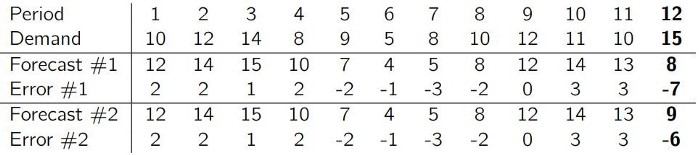

If we look at the KPI of these two forecasts, this is what we obtain:
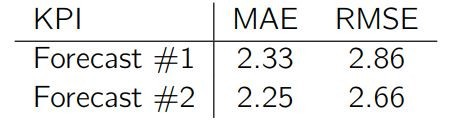

What is interesting here is that by just changing the error of this last period by a single unit, we decrease the total RMSE by 6.9% (2.86 to 2.66) but MAE is only reduced by 3.6% (2.33 to 2.25), so the impact on MAE is nearly twice as low. Clearly RMSE puts much more importance on the biggest errors whereas MAE gives the same importance to each error.

Overall, MAE provides protection against outliers whereas RMSE provides the assurance to get an unbiased forecast.

In [ ]:
best_model = {
        'Linear Regression':[2854.65, 3760.87, 0.83],
        'Ridge Regression':[2854.61, 3760.74, 0.83],
       'Lasso Regression':[2852.57, 3784.96, 0.83],
       'Optimized SVM':[6386.99, 9131.48, -0.0091],
       'Random Forest':[2127.80, 3065.70, 0.89],
       'Gradiant Boosting':[2093.38, 3124.43,   0.88]}

df_best_model = pd.DataFrame(best_model)

df_best_model.index = ['MAE', 'RMSE', 'R2_Score'] 

print(df_best_model)

MAE accuracy score (Taking into account that the gdp_per_capita values in the dataset ranges from 500 to 55100 USD.)

In [ ]:
ax = df_best_model.iloc[0].plot.bar(rot=90)

RSME accuracy score ((Taking into account that the gdp_per_capita values in the dataset ranges from 500 to 55100 USD.)

In [ ]:
ax = df_best_model.iloc[1].plot.bar(rot=90)

R2_score

In [ ]:
ax = df_best_model.iloc[2].plot.bar(rot=90)

### Conclusion:

In this project, we used countries_of_the_world dataset to predict GDP per Capita. We used 6 different learning regressors (Linear Regression, L1 and L2 regularization, SVM, Random Forest, and Gradiant Boosting) were tested.

Depending on the accuracy indicator, Random Forest and Gradient Boosting performed the best while SVM acheived the worst performance of the 4.

The best prediction performance was acheived using 

1) Random Forest regressor, using all features in the dataset, and resulted in the following metrics:

* Mean Absolute Error (MAE): 2127.80
* Root mean squared error (RMSE): 3065.70
* R-squared Score (R2_Score): 0.89

2) Gradient Boosting regressor, using all features in the dataset,

* Mean Absolute Error (MAE): 2093.38
* Root mean squared error (RMSE): 3124.44
* R-squared Score (R2_Score): 0.88

Taking into account that the gdp_per_capita values in the dataset ranges from 500 to 55100 USD.